# Import Dataset 

In [1]:
import warnings
import pandas as pd

In [2]:
warnings.filterwarnings("ignore")

In [3]:
dataset = pd.read_csv("./amazonDataset.csv",error_bad_lines=False)

In [4]:
dataset.head()

,product,title,rating,content
0,"100Pcs Disposable Face Masks, Black Face Mask,...",Do not purchase.,1.0,They smell horrible. I purchased them because ...
1,"100Pcs Disposable Face Masks, Black Face Mask,...",Smells bad,5.0,Smells weird !!
2,"100Pcs Disposable Face Masks, Black Face Mask,...",Worst quality I've ordered from Amazon,1.0,Ordered several different kind of masks I usua...
3,"100Pcs Disposable Face Masks, Black Face Mask,...","Finally, a 12 hour mask!",5.0,I’ve been struggling with wearing a mask throu...
4,"100Pcs Disposable Face Masks, Black Face Mask,...",I love this product,5.0,It very comfortable and light weight it's wort...


In [5]:
dataset.shape

(3270, 4)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3270 entries, 0 to 3269
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   product  3270 non-null   object 
 1   title    3263 non-null   object 
 2   rating   3270 non-null   float64
 3   content  3245 non-null   object 
dtypes: float64(1), object(3)
memory usage: 102.3+ KB


In [7]:
#checking missing value in dataset
count = dataset.isnull().sum().sort_values(ascending=False)
percentage = ((dataset.isnull().sum()/len(dataset)*100)).sort_values(ascending=False)
missing_data = pd.concat([count,percentage],axis=1,
                        keys = ['Count','Percentage'])

print('Count and percentage of missing valuesfor the column:')
missing_data

Count and percentage of missing valuesfor the column:


,Count,Percentage
content,25,0.764526
title,7,0.214067
rating,0,0.000000
product,0,0.000000


In [8]:
dataset.dropna()

,product,title,rating,content
0,"100Pcs Disposable Face Masks, Black Face Mask,...",Do not purchase.,1.0,They smell horrible. I purchased them because ...
1,"100Pcs Disposable Face Masks, Black Face Mask,...",Smells bad,5.0,Smells weird !!
2,"100Pcs Disposable Face Masks, Black Face Mask,...",Worst quality I've ordered from Amazon,1.0,Ordered several different kind of masks I usua...
3,"100Pcs Disposable Face Masks, Black Face Mask,...","Finally, a 12 hour mask!",5.0,I’ve been struggling with wearing a mask throu...
4,"100Pcs Disposable Face Masks, Black Face Mask,...",I love this product,5.0,It very comfortable and light weight it's wort...
...,...,...,...,...
3265,"100Pcs Disposable Face Masks, Black Face Mask,...",Still a nice product,5.0,Nice and comfortable fit.
3266,"100Pcs Disposable Face Masks, Black Face Mask,...",Perfect for airport,5.0,Got these for my trip last week.Pros: They go ...
3267,"100Pcs Disposable Face Masks, Black Face Mask,...",Great disposable mask,5.0,Very comfortable
3268,"100Pcs Disposable Face Masks, Black Face Mask,...",They Don't Stink,5.0,They fit well and didn't stink. That's all I h...


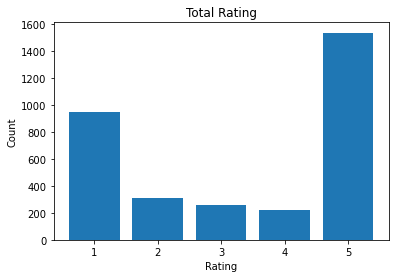

In [9]:
import matplotlib.pyplot as plt

roundedRating = dataset.rating.apply(int)
count = roundedRating.value_counts()
Rating = count.index

plt.bar(Rating, count)
plt.title('Total Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [10]:
#make the rating to +ve and -ve if the rating <3 will replace with 0, if rating >3 will replace with 1 

dataset.loc[dataset['rating']<3,'rating'] = 0
dataset.loc[dataset['rating']>3,'rating'] = 1

In [11]:
dataset.head()

,product,title,rating,content
0,"100Pcs Disposable Face Masks, Black Face Mask,...",Do not purchase.,0.0,They smell horrible. I purchased them because ...
1,"100Pcs Disposable Face Masks, Black Face Mask,...",Smells bad,1.0,Smells weird !!
2,"100Pcs Disposable Face Masks, Black Face Mask,...",Worst quality I've ordered from Amazon,0.0,Ordered several different kind of masks I usua...
3,"100Pcs Disposable Face Masks, Black Face Mask,...","Finally, a 12 hour mask!",1.0,I’ve been struggling with wearing a mask throu...
4,"100Pcs Disposable Face Masks, Black Face Mask,...",I love this product,1.0,It very comfortable and light weight it's wort...


# Seperate dataset into train and test 

In [12]:
#there are total 75% amount of dataset will be used to train and another last 25% will be used to testing. 
total_size = len(dataset)
print(total_size)

train_size = int(0.75* total_size)
print(train_size)

#train the dataset
train = dataset.head(train_size)

#test the dataset
test = dataset.tail(total_size - train_size)

3270
2452


In [13]:
train.rating.value_counts()

1.0    1167
0.0    1067
3.0     218
Name: rating, dtype: int64

In [14]:
test.rating.value_counts()

1.0    589
0.0    190
3.0     39
Name: rating, dtype: int64

In [15]:
train = train[train.rating != 3]
test = test[test.rating != 3]

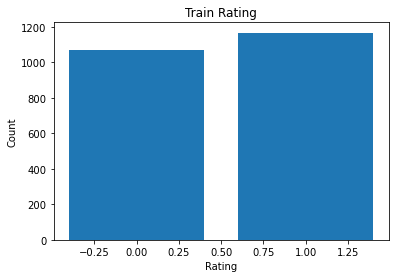

In [16]:
roundedRating = train.rating.apply(int)
count = roundedRating.value_counts()
Rating = count.index

plt.bar(Rating, count)
plt.title('Train Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

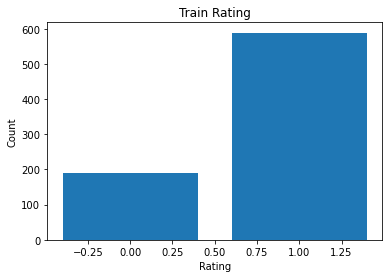

In [17]:
roundedRating = test.rating.apply(int)
count = roundedRating.value_counts()
Rating = count.index

plt.bar(Rating, count)
plt.title('Train Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [18]:
train['rating'].value_counts()

1.0    1167
0.0    1067
Name: rating, dtype: int64

In [19]:
test.rating.value_counts()

1.0    589
0.0    190
Name: rating, dtype: int64

# Dataset Preprocessing

In [20]:
! pip install textblob

In [21]:
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

In [22]:
df = pd.read_csv("./amazonDataset.csv",error_bad_lines=False)

In [23]:
lst_content = train['content'].tolist()
lst_title = train['title'].tolist()

In [24]:
test_content = test['content'].tolist()

In [25]:
#convert to lowercase
lst_content = [str(item).lower() for item in lst_content]
lst_title = [str(item).lower() for item in lst_title]

In [26]:
test_content = [str(item).lower() for item in test_content]

In [27]:
#remove the lower casing and the punctuations in the text
#The [] specifies a "group or set" of characters. the ^ directly after the [ specifies not to match that group or set.
#\s is whitespace characters, namely spacebar and tab.
#\w is alphanumeric characters.

df['content'] = df['content'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
df['content'] = df['content'].str.replace('[^\w\s]', "")
df.content.head()

0    they smell horrible i purchased them because i...
1                                        smells weird 
2    ordered several different kind of masks i usua...
3    ive been struggling with wearing a mask throug...
4    it very comfortable and light weight its worth...
Name: content, dtype: object

In [28]:
#remove stopword
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem.snowball import SnowballStemmer

In [29]:
stop_words = set(stopwords.words('english'))

for i in range(len(lst_content)):
    content_filtered = []
    title_filtered = []
    content_word_tokens = []
    title_word_tokens = []
    
    content_word_tokens = lst_content[i].split()
    title_word_tokens = lst_title[i].split()
    
    for r in content_word_tokens:
        if not r in stop_words:
            content_filtered.append(r)
    lst_content[i] = ' '.join(content_filtered)
    
    for r in title_word_tokens:
        if not r in stop_words:
            title_filtered.append(r)
    lst_title[i] = ' '.join(title_filtered)

In [30]:
for i in range(len(test_content)):
    content_filtered = []
    content_word_tokens = []
    
    content_word_tokens = test_content[i].split()
    
    for r in content_word_tokens:
        if not r in stop_words:
            content_filtered.append(r)
    test_content[i] = ' '.join(content_filtered)

In [31]:
stop = stopwords.words('english')
df['content'] = df['content'].apply(lambda x: " ".join(x for x in x .split()
                                                      if x not in stop))
df.content.head()

0    smell horrible purchased great deal wish revie...
1                                         smells weird
2    ordered several different kind masks usually g...
3    ive struggling wearing mask 12 hour shifts hos...
4           comfortable light weight worth every penny
Name: content, dtype: object

In [32]:
#remove html tag
import re

def striphtml(data):
    p = re.compile(r'<.*?>')
    return p.sub('', data)

for i in range (len(lst_content)):
    lst_content[i] = striphtml(lst_content[i])
    lst_title[i] = striphtml(lst_title[i])

In [33]:
for i in range (len(test_content)):
    test_content[i] = striphtml(test_content[i])

In [34]:
lst_content[0:5]

['smell horrible. purchased great deal wish reviewed reviews purchasing. know anyone loves these. thankful spend lot money them.',
 'smells weird !!',
 "ordered several different kind masks usually get multiple layered disposable went trying save couple bucks.not worth worth completely waste money, usable!!! i'm going pay double get expensive ones like complete 100% pocket waste. might well set money fire.there's open spaces cheeks chin germs fly people's faces protect all. vaccinated feel breath pouring sides chin area know keeping people safe germs.i went wasted 10 dollars cloth masks go keep sealed around face luck it, got really bad cloth masks.when open container paying attention cloth masks got go top wire nose keep masks either. still feel breath going sides neck.these disposable masks wire help bunch masks checked wire covers like half one part there's like wire remnants something. worst quality ever got feel like robbed. literally feel like took money right hands gave unusable

In [35]:
#remove special characters
for i in range(len(lst_content)):
    lst_content[i] = re.sub(r'[^A-Za-z]+', ' ', lst_content[i])
    lst_title[i] = re.sub(r'[^A-Za-z]+', ' ', lst_title[i])

In [36]:
for i in range(len(test_content)):
    test_content[i] = re.sub(r'[^A-Za-z]+', ' ', test_content[i])

In [37]:
#lemmatization
df['content'] = df['content'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 
df.content.head()

0    smell horrible purchased great deal wish revie...
1                                          smell weird
2    ordered several different kind mask usually ge...
3    ive struggling wearing mask 12 hour shift hosp...
4           comfortable light weight worth every penny
Name: content, dtype: object

In [38]:
#snowball stemming
stemmer = SnowballStemmer('english')

for i in range(len(lst_content)):
    content_filtered = []
    title_filtered = []
    content_word_tokens = []
    title_word_tokens = []
    
    content_word_tokens = lst_content[i].split()
    title_word_tokens = lst_title[i].split()
    
    for r in content_word_tokens:
        if not r in stop_words:
            content_filtered.append(str(stemmer.stem(r)))
    lst_content[i] = ' '.join(content_filtered)
    
    for r in title_word_tokens:
        title_filtered.append(str(stemmer.stem(r)))
    lst_title[i] = ' '.join(title_filtered)

In [39]:
for i in range(len(test_content)):
    content_filtered = []
    content_word_tokens = []
    
    content_word_tokens = test_content[i].split()
    
    for r in content_word_tokens:
        if not r in stop_words:
            content_filtered.append(str(stemmer.stem(r)))
    test_content[i] = ' '.join(content_filtered)

In [40]:
lst_content[0:5]

['smell horribl purchas great deal wish review review purchas know anyon love thank spend lot money',
 'smell weird',
 'order sever differ kind mask usual get multipl layer dispos went tri save coupl buck worth worth complet wast money usabl go pay doubl get expens one like complet pocket wast might well set money fire open space cheek chin germ fli peopl face protect vaccin feel breath pour side chin area know keep peopl safe germ went wast dollar cloth mask go keep seal around face luck got realli bad cloth mask open contain pay attent cloth mask got go top wire nose keep mask either still feel breath go side neck dispos mask wire help bunch mask check wire cover like half one part like wire remnant someth worst qualiti ever got feel like rob liter feel like took money right hand gave unus garbag',
 'struggl wear mask hour shift hospit hard breath one brand give headach coupl hour mani break hour get fluff mouth rest shift mask elimin problem comfort wear mask twelv hour straight iss

In [41]:
lst_content[0:5]

['smell horribl purchas great deal wish review review purchas know anyon love thank spend lot money',
 'smell weird',
 'order sever differ kind mask usual get multipl layer dispos went tri save coupl buck worth worth complet wast money usabl go pay doubl get expens one like complet pocket wast might well set money fire open space cheek chin germ fli peopl face protect vaccin feel breath pour side chin area know keep peopl safe germ went wast dollar cloth mask go keep seal around face luck got realli bad cloth mask open contain pay attent cloth mask got go top wire nose keep mask either still feel breath go side neck dispos mask wire help bunch mask check wire cover like half one part like wire remnant someth worst qualiti ever got feel like rob liter feel like took money right hand gave unus garbag',
 'struggl wear mask hour shift hospit hard breath one brand give headach coupl hour mani break hour get fluff mouth rest shift mask elimin problem comfort wear mask twelv hour straight iss

In [42]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r"",string)


for i in range (len(lst_content)):
    lst_content[i] = remove_emoji(lst_content[i])
    
lst_content[0:5]

['smell horribl purchas great deal wish review review purchas know anyon love thank spend lot money',
 'smell weird',
 'order sever differ kind mask usual get multipl layer dispos went tri save coupl buck worth worth complet wast money usabl go pay doubl get expens one like complet pocket wast might well set money fire open space cheek chin germ fli peopl face protect vaccin feel breath pour side chin area know keep peopl safe germ went wast dollar cloth mask go keep seal around face luck got realli bad cloth mask open contain pay attent cloth mask got go top wire nose keep mask either still feel breath go side neck dispos mask wire help bunch mask check wire cover like half one part like wire remnant someth worst qualiti ever got feel like rob liter feel like took money right hand gave unus garbag',
 'struggl wear mask hour shift hospit hard breath one brand give headach coupl hour mani break hour get fluff mouth rest shift mask elimin problem comfort wear mask twelv hour straight iss

# Sentimental Analysis using naive bayes

In [43]:
#vectorization for dataset 
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
vect = CountVectorizer()
x_train_dtm = vect.fit_transform(lst_content)

In [45]:
x_train_dtm

<2234x2157 sparse matrix of type '<class 'numpy.int64'>'
	with 22737 stored elements in Compressed Sparse Row format>

In [46]:
x_test_dtm = vect.transform(test_content)
x_test_dtm

<779x2157 sparse matrix of type '<class 'numpy.int64'>'
	with 4097 stored elements in Compressed Sparse Row format>

In [47]:
#multinomial naive bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

nb1 = MultinomialNB()
nb2 = GaussianNB()
nb3 = BernoulliNB()

In [48]:
#train model with using x_train_dtm
nb1.fit(x_train_dtm, train.rating)


MultinomialNB()

In [49]:
nb2.fit(x_train_dtm.todense(), train.rating)

GaussianNB()

In [50]:
nb3.fit(x_train_dtm, train.rating)

BernoulliNB()

In [51]:
#to use to do the predict class for x_test_dtm
y_pred_class_nb1 = nb1.predict(x_test_dtm)
y_pred_class_nb2 = nb2.predict(x_test_dtm.todense())
y_pred_class_nb3 = nb3.predict(x_test_dtm)

In [52]:
#calculation
from sklearn import metrics

#MultinomialNB
metrics.accuracy_score(test.rating, y_pred_class_nb1)

0.8870346598202824

In [53]:
#GaussianNB
metrics.accuracy_score(test.rating, y_pred_class_nb2)

0.7766367137355584

In [54]:
#BernoulliNB
metrics.accuracy_score(test.rating, y_pred_class_nb3)

0.8485237483953787

In [55]:
con_metrics_nb1 = metrics.confusion_matrix(test.rating, y_pred_class_nb1)
con_metrics_nb1

array([[164,  26],
       [ 62, 527]], dtype=int64)

In [56]:
con_metrics_nb2 = metrics.confusion_matrix(test.rating, y_pred_class_nb2)
con_metrics_nb2

array([[ 54, 136],
       [ 38, 551]], dtype=int64)

In [57]:
con_metrics_nb3 = metrics.confusion_matrix(test.rating, y_pred_class_nb3)
con_metrics_nb3

array([[ 98,  92],
       [ 26, 563]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix: MultinomialNB Naive Bayes')

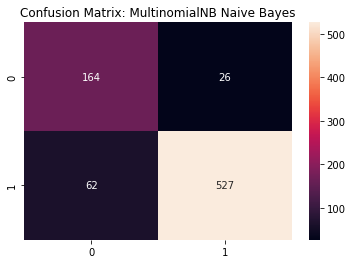

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(con_metrics_nb1, annot = True, fmt = 'd')
plt.title("Confusion Matrix: MultinomialNB Naive Bayes")

Text(0.5, 1.0, 'Confusion Matrix: BernoulliNB Naive Bayes')

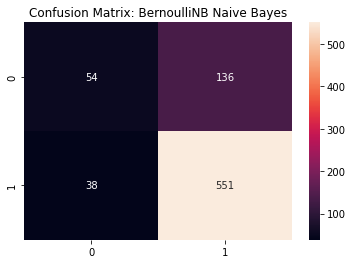

In [59]:
sns.heatmap(con_metrics_nb2, annot = True, fmt = 'd')
plt.title("Confusion Matrix: BernoulliNB Naive Bayes")

Text(0.5, 1.0, 'Confusion Matrix: GaussianNB Naive Bayes')

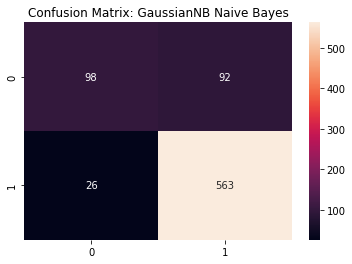

In [60]:
sns.heatmap(con_metrics_nb3, annot = True, fmt = 'd')
plt.title("Confusion Matrix: GaussianNB Naive Bayes")

In [61]:
from sklearn.metrics import classification_report

#MultinomialNB
#GaussianNB
#BernoulliNB
print(classification_report(test.rating, y_pred_class_nb1))#MultinomialNB
print(classification_report(test.rating, y_pred_class_nb2))#GaussianNB
print(classification_report(test.rating, y_pred_class_nb3))#BernoulliNB

              precision    recall  f1-score   support

         0.0       0.73      0.86      0.79       190
         1.0       0.95      0.89      0.92       589

    accuracy                           0.89       779
   macro avg       0.84      0.88      0.86       779
weighted avg       0.90      0.89      0.89       779

              precision    recall  f1-score   support

         0.0       0.59      0.28      0.38       190
         1.0       0.80      0.94      0.86       589

    accuracy                           0.78       779
   macro avg       0.69      0.61      0.62       779
weighted avg       0.75      0.78      0.75       779

              precision    recall  f1-score   support

         0.0       0.79      0.52      0.62       190
         1.0       0.86      0.96      0.91       589

    accuracy                           0.85       779
   macro avg       0.82      0.74      0.76       779
weighted avg       0.84      0.85      0.84       779



In [62]:
#calculate AUC 

#MultinomialNB
false_positive_rate1, true_positive_rate1, thresholds = metrics.roc_curve(test.rating, y_pred_class_nb1)
print(metrics.auc(false_positive_rate1, true_positive_rate1))

auc_nb1 = metrics.roc_auc_score(test.rating, y_pred_class_nb1)
print(auc_nb1)


#GaussianNB
false_positive_rate2, true_positive_rate2, thresholds2 = metrics.roc_curve(test.rating, y_pred_class_nb2)
print(metrics.auc(false_positive_rate2, true_positive_rate2))

auc_nb2 = metrics.roc_auc_score(test.rating, y_pred_class_nb2)
print(auc_nb2)


#BernoulliNB
false_positive_rate3, true_positive_rate3, thresholds3 = metrics.roc_curve(test.rating, y_pred_class_nb3)
print(metrics.auc(false_positive_rate3, true_positive_rate3))

auc_nb3 = metrics.roc_auc_score(test.rating, y_pred_class_nb3)
print(auc_nb3)

0.8789473684210527
0.8789473684210527
0.6098471986417657
0.6098471986417657
0.735823429541596
0.735823429541596


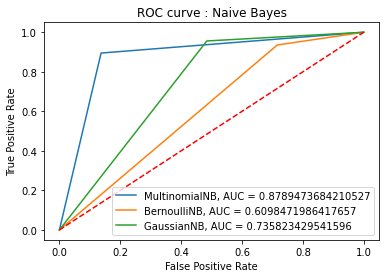

In [63]:
plt.plot(false_positive_rate1, true_positive_rate1, label = "MultinomialNB, AUC = " + str(auc_nb1))
plt.plot(false_positive_rate2, true_positive_rate2, label = "BernoulliNB, AUC = " + str(auc_nb2))
plt.plot(false_positive_rate3, true_positive_rate3, label = "GaussianNB, AUC = " + str(auc_nb3))
plt.plot([0,1], [0,1],'r--')
plt.title('ROC curve : Naive Bayes')
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Test

In [64]:
from nltk.stem import WordNetLemmatizer

lm = WordNetLemmatizer()

In [65]:
def text_transformation(df_col):
    corpus = []
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus

In [66]:
def expression_check(prediction_input):
    if prediction_input == 0:
        print("Input statement has Negative Sentiment.")
    elif prediction_input == 1:
        print("Input statement has Positive Sentiment.")
    else:
        print("Invalid Statement.")

In [67]:
# function to take the input statement and perform the same transformations we did earlier
def sentiment_predictor1(input):
    input = text_transformation(input)
    transformed_input = vect.transform(input)
    prediction1 = nb1.predict(transformed_input)   
    expression_check(prediction1)

def sentiment_predictor2(input):
    input = text_transformation(input)
    transformed_input = vect.transform(input)
    prediction2 = nb2.predict(transformed_input.todense())
    expression_check(prediction2) 

def sentiment_predictor3(input):
    input = text_transformation(input)
    transformed_input = vect.transform(input)
    prediction3 = nb3.predict(transformed_input)
    expression_check(prediction3) 
 

In [68]:
input1 = ["bad"]
input2 = ["Good"]

In [69]:
sentiment_predictor1(input1)
sentiment_predictor1(input2)

sentiment_predictor2(input1)
sentiment_predictor2(input2)

sentiment_predictor3(input1)
sentiment_predictor3(input2)

Input statement has Negative Sentiment.
Input statement has Positive Sentiment.
Input statement has Positive Sentiment.
Input statement has Positive Sentiment.
Input statement has Positive Sentiment.
Input statement has Positive Sentiment.


# WordCloud

In [70]:
! pip install wordcloud

In [71]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from matplotlib import pyplot as plt

In [72]:
warnings.filterwarnings("ignore")

In [73]:
worldCloudDataset = pd.read_csv("./amazonDataset.csv",error_bad_lines=False)

In [74]:
review = worldCloudDataset

review.dropna(inplace = True)

In [75]:
rate1 = review[review['rating'] == 1]
rate2 = review[review['rating'] == 2]
rate3 = review[review['rating'] == 3]
rate4 = review[review['rating'] == 4]
rate5 = review[review['rating'] == 5]

In [76]:
sample = pd.concat([rate1, rate2, rate3, rate4, rate5], axis = 0)
sample.reset_index(drop = True, inplace = True)

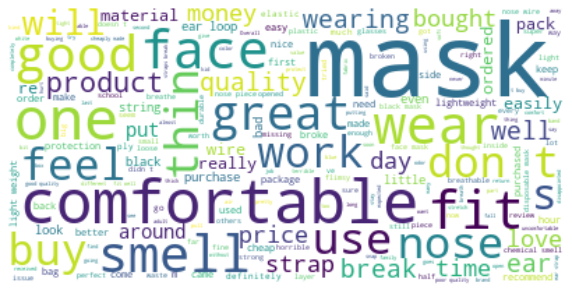

In [77]:
review_str = sample.content.str.cat()
wordcloud = WordCloud(background_color = 'white').generate(review_str)
plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [78]:
bad_review = sample[sample['rating'].isin([1,2])]
good_review = sample[sample['rating'].isin([4,5])]

bad_review_str = bad_review.title.str.cat()
good_review_str = good_review.title.str.cat()


Text(0.5, 1.0, 'Bad Review')

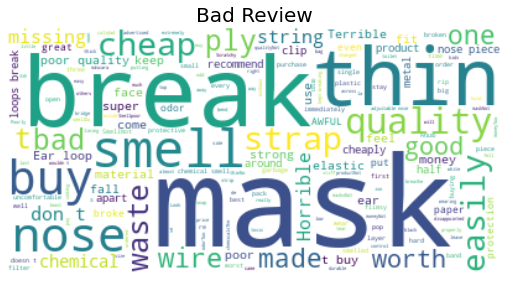

In [79]:
wordcloud_bad = WordCloud(background_color = 'white').generate(bad_review_str)
wordcloud_good = WordCloud(background_color = 'black').generate(good_review_str)

#plot
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_bad, interpolation = 'bilinear')
ax1.axis("off")
ax1.set_title('Bad Review', fontsize = 20)

Text(0.5, 1.0, 'Good Review')

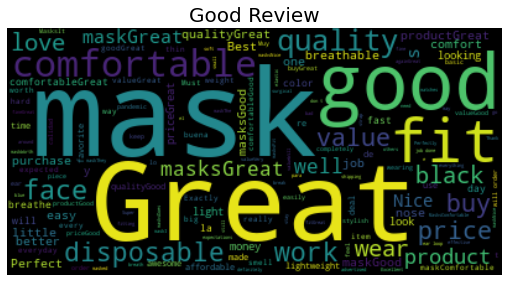

In [80]:
fig = plt.figure(figsize = (10,10))
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_good, interpolation = 'bilinear')
ax2.axis("off")
ax2.set_title('Good Review', fontsize = 20)